In [76]:
import pandas as pd
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import ast
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

In [20]:
lemmatized_text_data = pd.read_csv(r"C:\Users\Utkarsh\Desktop\Amazon_comments_processed.csv")
lemmatized_text_data = lemmatized_text_data.iloc[:, 1:]
lemmatized_text_data

,Title_Review,Stars,Company_name,Recommend,CEO_approval,Business_outlook,Pros,Cons,Employee_seniority,Location,Date,id
0,"['good', 'impression', 'first', 'month']",5.0,['amazon'],['positive'],['neutral'],['neutral'],"['documentation', 'amazon', 'super', 'importan...","['need', 'understand', 'job', 'need', 'improve...","['current', 'employee', 'less', '1', 'year']",['toronto'],"['feb.', '2', '2023']",empReview_73247758
1,['intern'],5.0,['amazon'],['neutral'],['neutral'],['neutral'],"['4', 'day', 'shifts', 'nice']","['long', 'hour', 'shift', 'make', 'feel', 'tire']","['former', 'employee', 'less', '1', 'year']",['toronto'],"['jan.', '31', '2023']",empReview_73187609
2,['good'],5.0,['amazon'],['positive'],['positive'],['positive'],"['great', 'work', 'balance', 'great', 'environ...","['workload', 'heavy', 'sometimes']","['former', 'employee', '1', 'year']","['amazon', 'sk']","['jan.', '31', '2023']",empReview_73188818
3,"['job', 'review']",5.0,['amazon'],['positive'],['positive'],['positive'],"['good', 'benefit', 'flexible', 'time', 'shift...","['good', 'organization', 'work', 'well', 'car'...","['former', 'employee']",['nan'],"['jan.', '31', '2023']",empReview_73190433
4,"['growth', 'opportunity']",4.0,['amazon'],['positive'],['negative'],['negative'],"['fast', 'paced', 'start-up', 'culture', 'bene...","['compensation', 'growth', 'prospect', 'develo...","['current', 'employee', '3', 'year']","['vancouver', 'bc']","['jan.', '31', '2023']",empReview_73197210
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"['great', 'pay', 'onboarding']",5.0,['amazon'],['positive'],['positive'],['positive'],"['amazon', 'wonderful', 'search', 'site', 'fin...","['interview', 'process', 'long', 'worth', 'end']","['current', 'employee', 'less', '1', 'year']",['nan'],"['dec.', '1', '2022']",empReview_71536795
9996,"['great', 'comp']",5.0,['amazon'],['neutral'],['neutral'],['neutral'],"['great', 'company', 'easy', 'find', 'area', '...","['get', 'unlucky', 'team']","['current', 'employee']",['nan'],"['dec.', '1', '2022']",empReview_71537065
9997,"['far', 'good']",5.0,['amazon'],['positive'],['positive'],['positive'],"['great', 'teamwork', 'great', 'work', 'enviro...","['little', 'far', 'home']","['current', 'employee', 'less', '1', 'year']","['querétaro', 'querétaro']","['dec.', '1', '2022']",empReview_71539933
9998,"['use', 'great', 'company']",2.0,['amazon'],['negative'],['negative'],['negative'],"['become', 'excellent', 'problem', 'solver', '...","['cut-throat', 'management', 'toxic', 'culture...","['former', 'employee', '1', 'year']","['diego', 'ca']","['dec.', '15', '2022']",empReview_71882994


In [43]:
df = lemmatized_text_data[['id', 'Employee_seniority', 'Pros', 'Cons']]
df['current_employee'] = df['Employee_seniority'].apply(lambda x: 'current' in x).astype(int)
df = df[['id', 'current_employee', 'Pros', 'Cons']]
df['Pros'] = df['Pros'].apply(ast.literal_eval)
df['Cons'] = df['Cons'].apply(ast.literal_eval)
df

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_1960\1187017345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_employee'] = df['Employee_seniority'].apply(lambda x: 'current' in x).astype(int)


,id,current_employee,Pros,Cons
0,empReview_73247758,1,"[documentation, amazon, super, important, poin...","[need, understand, job, need, improve, good, d..."
1,empReview_73187609,0,"[4, day, shifts, nice]","[long, hour, shift, make, feel, tire]"
2,empReview_73188818,0,"[great, work, balance, great, environment, loc...","[workload, heavy, sometimes]"
3,empReview_73190433,0,"[good, benefit, flexible, time, shift, take, c...","[good, organization, work, well, car, parking,..."
4,empReview_73197210,1,"[fast, paced, start-up, culture, benefit]","[compensation, growth, prospect, development, ..."
...,...,...,...,...
9995,empReview_71536795,1,"[amazon, wonderful, search, site, find, anythi...","[interview, process, long, worth, end]"
9996,empReview_71537065,1,"[great, company, easy, find, area, like]","[get, unlucky, team]"
9997,empReview_71539933,1,"[great, teamwork, great, work, environment, pe...","[little, far, home]"
9998,empReview_71882994,0,"[become, excellent, problem, solver, use, data...","[cut-throat, management, toxic, culture, unnec..."


## Pros:

In [63]:
# Prepare Dictionary
data_ready_pros = df['Pros'].tolist()
id2word = corpora.Dictionary(data_ready_pros)
corpus_pros = [id2word.doc2bow(text) for text in data_ready_pros]

In [51]:
# Building model
num_topics = [i+1 for i in range(8)]
num_keywords = 20

LDA_models = {}
LDA_topics = {}
for i in tqdm(num_topics):
    LDA_models[i] = gensim.models.ldamodel.LdaModel(corpus=corpus_pros,
                                                    id2word=id2word,
                                                    num_topics=i,
                                                    update_every=1,
                                                    chunksize=10,
                                                    passes=20,
                                                    alpha='asymmetric',
                                                    random_state=100)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [11:16<00:00, 84.58s/it]


In [52]:
coherences = []
for i in tqdm(num_topics):
    coherences.append(gensim.models.CoherenceModel(model=LDA_models[i], texts=data_ready_pros, dictionary=id2word, coherence='c_v').get_coherence())

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:19<00:00,  9.98s/it]


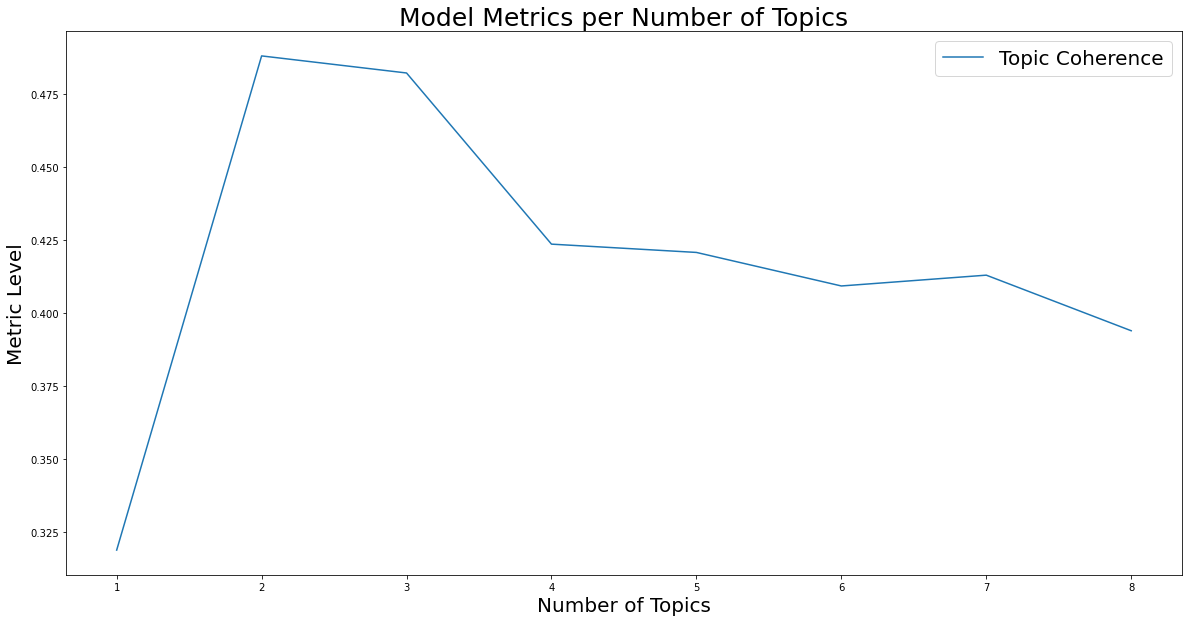

In [58]:
# Visualizing results
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics, y=coherences, label='Topic Coherence')
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [67]:
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            

        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [66]:
n_topics_pros = 2
lda_model_pros = LDA_models[n_topics_pros]

In [68]:
df_topic_pros_keywords = format_topics_sentences(ldamodel=lda_model_pros, corpus=corpus_pros, texts=data_ready_pros)

# Format
df_dominant_topic = df_topic_pros_keywords.reset_index()
df_dominant_topic.columns = ['Review_ID', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_1960\2700792715.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_1960\2700792715.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [71]:
df_dominant_topic['Review_ID'] = df['id']
df_dominant_topic.head(10)

,Review_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,empReview_73247758,1,0.8816,"opportunity, learn, amazon, lot, growth, work,...","[documentation, amazon, super, important, poin..."
1,empReview_73187609,0,0.9250,"good, work, great, pay, benefit, time, job, en...","[4, day, shifts, nice]"
2,empReview_73188818,0,0.8313,"good, work, great, pay, benefit, time, job, en...","[great, work, balance, great, environment, loc..."
3,empReview_73190433,0,0.6971,"good, work, great, pay, benefit, time, job, en...","[good, benefit, flexible, time, shift, take, c..."
4,empReview_73197210,0,0.9292,"good, work, great, pay, benefit, time, job, en...","[fast, paced, start-up, culture, benefit]"
5,empReview_73208298,1,0.7689,"opportunity, learn, amazon, lot, growth, work,...","[opportunity, grow, work, talented, people]"
6,empReview_73149307,1,0.8495,"opportunity, learn, amazon, lot, growth, work,...","[lot, challenge, speak, data, great, leadership]"
7,empReview_73146117,0,0.7682,"good, work, great, pay, benefit, time, job, en...","[good, pay, benefit, new, grad]"
8,empReview_73105526,0,0.9354,"good, work, great, pay, benefit, time, job, en...","[pay, rate, good, accord, work]"
9,empReview_73108472,0,0.7679,"good, work, great, pay, benefit, time, job, en...","[great, benefit, bonus, everything, available,..."


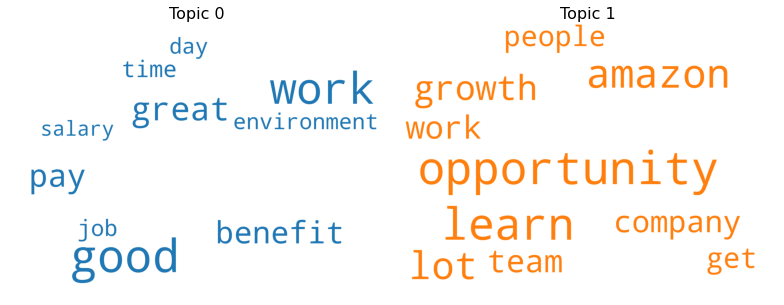

In [78]:
stop_words = set(stopwords.words('english'))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(11,11), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Cons:

In [79]:
# Prepare Dictionary
data_ready_cons = df['Cons'].tolist()
id2word = corpora.Dictionary(data_ready_cons)
corpus_cons = [id2word.doc2bow(text) for text in data_ready_cons]

In [80]:
# Building model
num_topics = [i+1 for i in range(8)]
num_keywords = 20

LDA_models = {}
LDA_topics = {}
for i in tqdm(num_topics):
    LDA_models[i] = gensim.models.ldamodel.LdaModel(corpus=corpus_cons,
                                                    id2word=id2word,
                                                    num_topics=i,
                                                    update_every=1,
                                                    chunksize=10,
                                                    passes=20,
                                                    alpha='asymmetric',
                                                    random_state=100)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [14:03<00:00, 105.38s/it]


In [81]:
coherences = []
for i in tqdm(num_topics):
    coherences.append(gensim.models.CoherenceModel(model=LDA_models[i], texts=data_ready_cons, dictionary=id2word, coherence='c_v').get_coherence())

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:02<00:00,  7.84s/it]


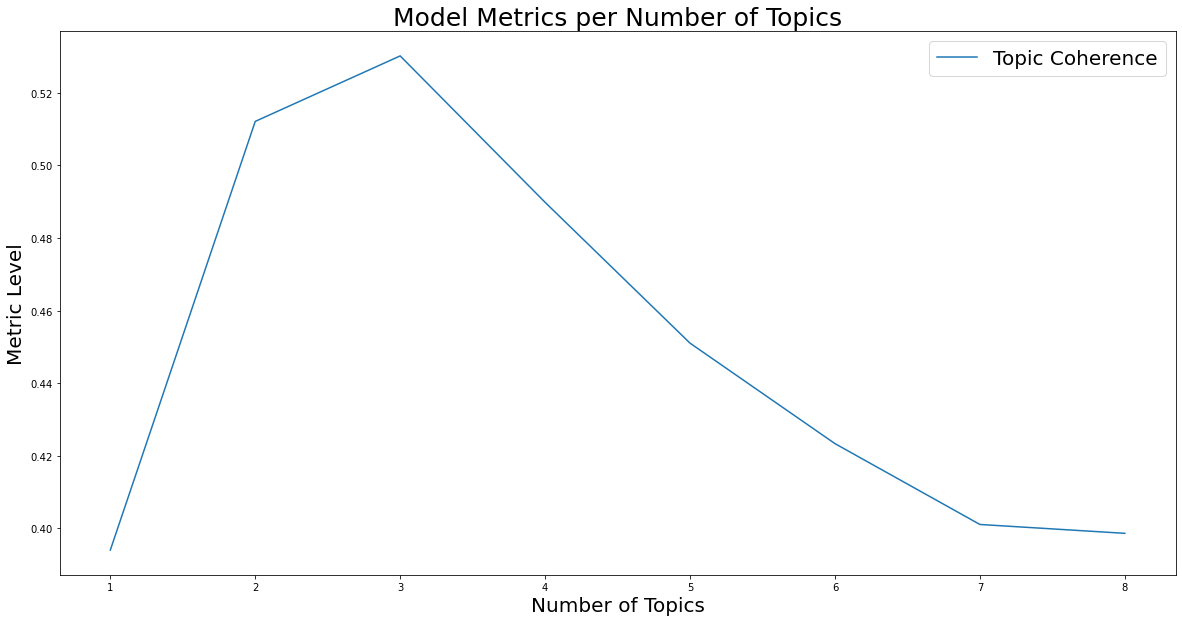

In [82]:
# Visualizing results
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics, y=coherences, label='Topic Coherence')
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [84]:
n_topics_cons = 3
lda_model_cons = LDA_models[n_topics_cons]

In [85]:
df_topic_cons_keywords = format_topics_sentences(ldamodel=lda_model_cons, corpus=corpus_cons, texts=data_ready_cons)

# Format
df_dominant_topic_cons = df_topic_cons_keywords.reset_index()
df_dominant_topic_cons.columns = ['Review_ID', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_1960\2700792715.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_1960\2700792715.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [86]:
df_dominant_topic_cons['Review_ID'] = df['id']
df_dominant_topic_cons.head(10)

,Review_ID,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,empReview_73247758,2,0.6520,"n't, con, job, manager, amazon, employee, like...","[need, understand, job, need, improve, good, d..."
1,empReview_73187609,0,0.6398,"work, hour, time, long, lot, day, shift, much,...","[long, hour, shift, make, feel, tire]"
2,empReview_73188818,0,0.8691,"work, hour, time, long, lot, day, shift, much,...","[workload, heavy, sometimes]"
3,empReview_73190433,1,0.4363,"get, bad, pay, balance, good, culture, life, t...","[good, organization, work, well, car, parking,..."
4,empReview_73197210,1,0.8770,"get, bad, pay, balance, good, culture, life, t...","[compensation, growth, prospect, development, ..."
5,empReview_73208298,0,0.5003,"work, hour, time, long, lot, day, shift, much,...","[potential, layoff, fast, pace]"
6,empReview_73149307,1,0.4016,"get, bad, pay, balance, good, culture, life, t...","[none, best, company, ever, glad, worked]"
7,empReview_73146117,0,0.8953,"work, hour, time, long, lot, day, shift, much,...","[lot, work, high, stress]"
8,empReview_73105526,0,0.4953,"work, hour, time, long, lot, day, shift, much,...","[much, stress, give, employee]"
9,empReview_73108472,0,0.5310,"work, hour, time, long, lot, day, shift, much,...","[work, culture, negative, depend, location, li..."


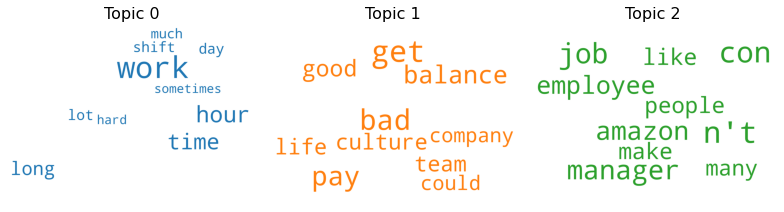

In [88]:
stop_words = set(stopwords.words('english'))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_cons.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(11,11), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Data Export:

In [92]:
df_pros_cons = df[["id", "current_employee"]]

df_pros_cons["Pros_Dominant_Topic"] = df_dominant_topic["Dominant_Topic"]
df_pros_cons["Pros_Topic_Perc_Contrib"] = df_dominant_topic["Topic_Perc_Contrib"]
df_pros_cons["Pros_Keywords"] = df_dominant_topic["Keywords"]

df_pros_cons["Cons_Dominant_Topic"] = df_dominant_topic_cons["Dominant_Topic"]
df_pros_cons["Cons_Topic_Perc_Contrib"] = df_dominant_topic_cons["Topic_Perc_Contrib"]
df_pros_cons["Cons_Keywords"] = df_dominant_topic_cons["Keywords"]

df_pros_cons

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_1960\977120469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pros_cons["Pros_Dominant_Topic"] = df_dominant_topic["Dominant_Topic"]


,id,current_employee,Pros_Dominant_Topic,Pros_Topic_Perc_Contrib,Pros_Keywords,Cons_Dominant_Topic,Cons_Topic_Perc_Contrib,Cons_Keywords
0,empReview_73247758,1,1,0.8816,"opportunity, learn, amazon, lot, growth, work,...",2,0.6520,"n't, con, job, manager, amazon, employee, like..."
1,empReview_73187609,0,0,0.9250,"good, work, great, pay, benefit, time, job, en...",0,0.6398,"work, hour, time, long, lot, day, shift, much,..."
2,empReview_73188818,0,0,0.8313,"good, work, great, pay, benefit, time, job, en...",0,0.8691,"work, hour, time, long, lot, day, shift, much,..."
3,empReview_73190433,0,0,0.6971,"good, work, great, pay, benefit, time, job, en...",1,0.4363,"get, bad, pay, balance, good, culture, life, t..."
4,empReview_73197210,1,0,0.9292,"good, work, great, pay, benefit, time, job, en...",1,0.8770,"get, bad, pay, balance, good, culture, life, t..."
...,...,...,...,...,...,...,...,...
9995,empReview_71536795,1,1,0.6897,"opportunity, learn, amazon, lot, growth, work,...",1,0.4644,"get, bad, pay, balance, good, culture, life, t..."
9996,empReview_71537065,1,1,0.6064,"opportunity, learn, amazon, lot, growth, work,...",1,0.8251,"get, bad, pay, balance, good, culture, life, t..."
9997,empReview_71539933,1,0,0.9658,"good, work, great, pay, benefit, time, job, en...",0,0.6141,"work, hour, time, long, lot, day, shift, much,..."
9998,empReview_71882994,0,1,0.9774,"opportunity, learn, amazon, lot, growth, work,...",1,0.4154,"get, bad, pay, balance, good, culture, life, t..."


In [93]:
df_pros_cons.to_csv('employee_pros_cons_topic_modelling.csv', index=False)